In [1]:
import sys
import re
import bz2

regex = re.compile("[^a-zA-Z]")

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Dataset of Australian legal case and Wikipedia Pages

You should download and look at the Court-Wiki-Dataset.txt

file before you begin. You’ll see that the contents are sort of a pseudo-XML, where each text document
begins with a $<doc \ id = ... >$ tag, and ends with $</doc>$.

Note that all of the Australia legal cases begin with something like $<\text{doc id = ‘‘AU1222’’ ...}>$
that is, the doc id for an Australian legal case always starts with AU. You will be trying to figure out if the
document is an Australian legal case by looking only at the contents of the document.

In [2]:
file = bz2.open("./datasets/Court-Wiki-Dataset.txt.bz2", "r")



data = pd.DataFrame(columns=['text','label'])

count = 0 
for line in file:
    count +=1

    line = (lambda x : (x[x.index('id="') + 4 : x.index('" url=')], x[x.index('">') + 2:][:-6]))(str(line))
    text = np.array(regex.sub(" ", line[1]).lower().split())
    
    data = data.append({'text' : text, 'label' : line[0]}, ignore_index = True)

    if(count%100==0):
        print("Line number: " , count)


# text_list
print("Line number: " , count)

data

Line number:  100
Line number:  200
Line number:  300
Line number:  400
Line number:  500
Line number:  600
Line number:  700
Line number:  800
Line number:  800


,text,label
0,"[purported, appeal, from, orders, made, by, fe...",AU11
1,"[bankruptcy, noticefailure, by, creditor, to, ...",AU28
2,"[where, documents, produced, to, commission, o...",AU29
3,"[leave, to, appealinterlocutory, judgmentwheth...",AU31
4,"[applicant, a, married, person, who, had, unde...",AU38
...,...,...
795,"[le, landeronle, landeron, is, a, municipality...",6292963
796,"[saint, blaise, switzerlandsaint, blaise, is, ...",6293133
797,"[tahirih, justice, centerthe, tahirih, justice...",6220600
798,"[the, ladies, of, grace, adieu, and, other, st...",6221345


In [3]:
# Convert the labels. 
# if it has AU it means it is an austrial court case report and if not it is a wikipedia article. 

data['label'] = data['label'].apply(lambda x: 1 if 'AU' in str(x) else 0  )
data

,text,label
0,"[purported, appeal, from, orders, made, by, fe...",1
1,"[bankruptcy, noticefailure, by, creditor, to, ...",1
2,"[where, documents, produced, to, commission, o...",1
3,"[leave, to, appealinterlocutory, judgmentwheth...",1
4,"[applicant, a, married, person, who, had, unde...",1
...,...,...
795,"[le, landeronle, landeron, is, a, municipality...",0
796,"[saint, blaise, switzerlandsaint, blaise, is, ...",0
797,"[tahirih, justice, centerthe, tahirih, justice...",0
798,"[the, ladies, of, grace, adieu, and, other, st...",0


In [4]:
# Create a Dictionary with all of the words in all documents 
# Count them up 
# Get the top 600 most common words. 

from collections import Counter
my_dict=Counter()

# iterate through list-string
for item in data['text']:
    
    my_dict += Counter(list(item))
    
# Print the top 10 just for checking 
print(my_dict.most_common(10))

no_features = 600 
# We use the top no_features as our dictionary
top_words= my_dict.most_common(no_features)

[('the', 241893), ('of', 116082), ('to', 90280), ('in', 71618), ('and', 65776), ('a', 56040), ('that', 52481), ('is', 30818), ('was', 28784), ('s', 26366)]


In [5]:
# Sorted List of words based on their frequencies
my_dict_words = sorted(top_words, key=lambda k: top_words[1])

# This is the order of words based on their frequencies
# We use this order to create feature vectors for our text corpus. 
dict_words= list(zip(*my_dict_words))[0]

dict_words

('the',
 'of',
 'to',
 'in',
 'and',
 'a',
 'that',
 'is',
 'was',
 's',
 'for',
 'on',
 'by',
 'as',
 'it',
 'not',
 'be',
 'or',
 'at',
 'with',
 'an',
 'which',
 'he',
 'mr',
 'from',
 'his',
 'this',
 'i',
 'have',
 'had',
 'were',
 'are',
 'x',
 'would',
 'act',
 'has',
 'been',
 'any',
 'there',
 'court',
 'tribunal',
 'no',
 'its',
 'made',
 'evidence',
 'applicant',
 'other',
 'also',
 'they',
 'if',
 'under',
 'may',
 'but',
 'one',
 'first',
 'application',
 'their',
 'v',
 'such',
 'her',
 'said',
 'time',
 'xe',
 'all',
 'decision',
 'did',
 'appellant',
 'case',
 'will',
 'out',
 'whether',
 'she',
 'about',
 'claim',
 'order',
 'those',
 'who',
 'so',
 'into',
 'these',
 'when',
 'two',
 'after',
 'part',
 'before',
 'should',
 'only',
 'new',
 'between',
 'some',
 'however',
 'than',
 'information',
 'being',
 'j',
 'respondent',
 'xc',
 'further',
 'do',
 'more',
 'because',
 'each',
 'where',
 'relevant',
 'could',
 'costs',
 'him',
 'appeal',
 'person',
 'can',
 'aust

In [6]:
data['text']=data['text'].apply(lambda x:Counter(list(x)) )
data

,text,label
0,"{'purported': 3, 'appeal': 12, 'from': 3, 'ord...",1
1,"{'bankruptcy': 21, 'noticefailure': 1, 'by': 2...",1
2,"{'where': 5, 'documents': 49, 'produced': 1, '...",1
3,"{'leave': 21, 'to': 68, 'appealinterlocutory':...",1
4,"{'applicant': 31, 'a': 87, 'married': 21, 'per...",1
...,...,...
795,"{'le': 25, 'landeronle': 1, 'landeron': 26, 'i...",0
796,"{'saint': 12, 'blaise': 12, 'switzerlandsaint'...",0
797,"{'tahirih': 68, 'justice': 21, 'centerthe': 1,...",0
798,"{'the': 122, 'ladies': 6, 'of': 75, 'grace': 6...",0


In [7]:
def convert_words_to_numbers(input_dict_text):
    # get a numpy of no_features zeros 
    a = np.zeros(no_features)
    for i in range(no_features):
        if (dict_words[i] in input_dict_text):
            a[i] = input_dict_text.get(dict_words[i])
    return a


    
convert_words_to_numbers(data['text'][0])        

array([124.,  56.,  54.,  24.,  36.,  28.,  47.,  15.,  22.,  13.,  23.,
        18.,  13.,   7.,  14.,  18.,   3.,   0.,   7.,   8.,  16.,   1.,
         7.,   0.,   3.,   1.,   1.,  10.,   7.,   2.,   2.,   3.,   0.,
         7.,  11.,   3.,   4.,   3.,   0.,   9.,  23.,   1.,   5.,   6.,
         2.,  21.,   0.,   0.,   0.,   2.,  12.,   1.,   3.,   3.,   4.,
        12.,   0.,   4.,   0.,  14.,   2.,   2.,   0.,   1.,  12.,  11.,
         0.,   4.,   2.,   1.,   4.,  27.,   3.,   0.,   5.,   3.,   0.,
         3.,   1.,   1.,   1.,   5.,   2.,   0.,   5.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   9.,   0.,   0.,   0.,   0.,   4.,   3.,
         1.,   2.,   1.,   1.,   2.,   2.,   2.,   0.,  12.,   1.,   0.,
         3.,   0.,   5.,   0.,   1.,   3.,   2.,   0.,   9.,   1.,   1.,
         3.,   0.,   1.,   0.,   1.,   1.,   1.,   1.,   0.,   0.,   2.,
         1.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,
         1.,   0.,   3.,   0.,   0.,  11.,   0.,   

In [8]:
data['features']=data['text'].apply(lambda x:convert_words_to_numbers(x))
data = data.drop(['text'], axis=1)

data

,label,features
0,1,"[124.0, 56.0, 54.0, 24.0, 36.0, 28.0, 47.0, 15..."
1,1,"[187.0, 100.0, 79.0, 60.0, 41.0, 56.0, 43.0, 1..."
2,1,"[186.0, 97.0, 77.0, 37.0, 28.0, 23.0, 57.0, 14..."
3,1,"[139.0, 55.0, 68.0, 34.0, 20.0, 33.0, 43.0, 24..."
4,1,"[491.0, 303.0, 193.0, 128.0, 175.0, 87.0, 74.0..."
...,...,...
795,0,"[165.0, 105.0, 27.0, 56.0, 52.0, 31.0, 4.0, 27..."
796,0,"[83.0, 63.0, 10.0, 30.0, 38.0, 16.0, 2.0, 23.0..."
797,0,"[173.0, 84.0, 87.0, 70.0, 115.0, 36.0, 29.0, 1..."
798,0,"[122.0, 75.0, 37.0, 46.0, 57.0, 28.0, 16.0, 32..."


In [9]:
print("count of Australian Court Cases", len(data[data['label'] ==1]))

count of Australian Court Cases 377


In [10]:

X = data['features'].to_numpy()
y = data['label']

X = np.array(list(map(lambda x: list(x), X)))
X.shape

(800, 600)

In [11]:
import numpy as np
from sklearn.decomposition import PCA


# Use fit and transform method
pca = PCA(n_components=3)
pca.fit(X)

transformed_data=pca.transform(X)
print(transformed_data.shape)

print(pca.explained_variance_ratio_)
print(pca.singular_values_)



transformed_data.T

(800, 3)
[0.89824308 0.02900658 0.00710236]
[18520.34209506  3328.13027368  1646.84722272]


array([[-2.35280314e+02, -1.47833611e+02, -1.61143061e+02, ...,
        -1.56042376e+02, -2.34614947e+02, -3.24965428e+02],
       [ 1.34808597e+01, -6.15105490e+00,  3.07132449e-01, ...,
        -3.41592766e+00, -3.03000609e+00,  1.52923693e+01],
       [ 2.23070123e+01,  2.05803837e+01,  1.77344428e+01, ...,
        -3.03357786e+00, -1.09066465e+00,  7.17170190e+00]])

In [12]:
len(data['label'])

800

(3,)


Text(0, 0.5, 'pc2')

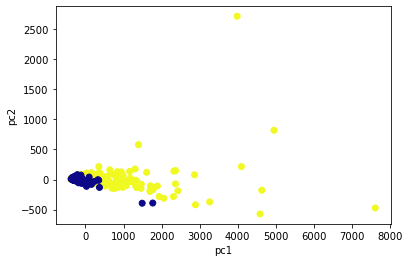

In [13]:
# plt.figure(figsize=(10,10))
print(transformed_data[0].shape)
plt.scatter(transformed_data.T[0], transformed_data.T[1], c=data['label'] ,  cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

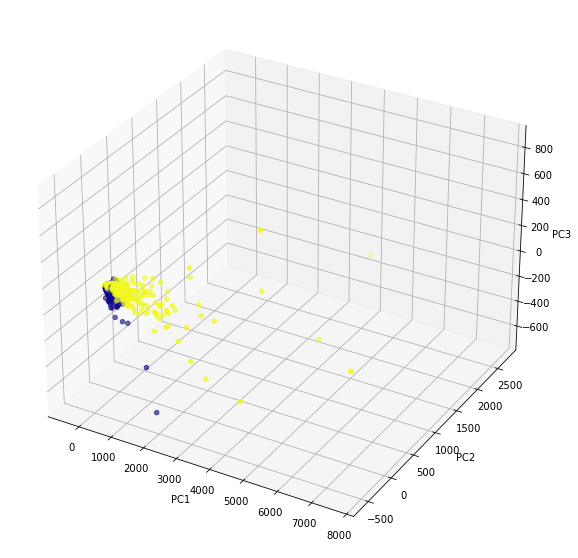

In [14]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
axis.scatter(transformed_data.T[0],transformed_data.T[1],transformed_data.T[2], c=data['label'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [15]:
# How much variance is explained by each principal component
print(pca.explained_variance_ratio_)

[0.89824308 0.02900658 0.00710236]


# Document Classification 



In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=500, fit_intercept=True)
model.fit(X_train,y_train)



y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.99375


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_data, y, test_size=0.2, random_state=123)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=500, fit_intercept=True)
model.fit(X_train,y_train)



y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.94375
